In [13]:
import matplotlib.pyplot as plt
import numpy as np
import time

# Números Palidrômicos
encontre os primeiros 1000 números naturais palindrômicos (que são iguais nos dois sentidos). 
Restrições: 
- ignorar os números de 0 a 9 
- ignorar os números que sejam formados exclusivamente do mesmo algarismo, por exemplo: 222222

In [5]:
def num_pal(m):
    """
    m: numero de palindromes a ser encontrado
    """
    p=10
    n = 0
    palindromes = []
    while n < m:
        p += 1
        P = str(p)
        if len(set(P)) == 1:
            continue
        if P[::1] == P[::-1]:
            n += 1
            palindromes.append(p)
    return palindromes

In [10]:
%%time
palindromes = num_pal(5000)
palindromes[-1]

CPU times: total: 1.52 s
Wall time: 2.14 s


4058504

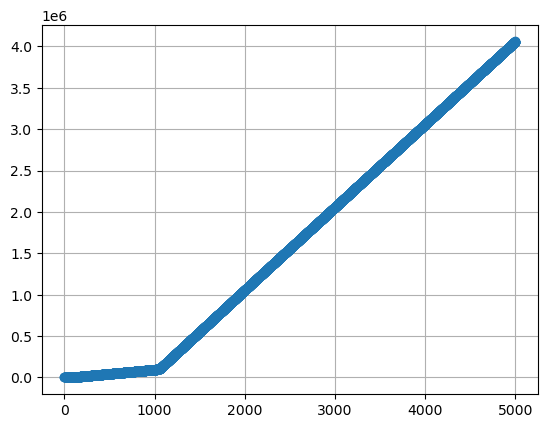

In [11]:
plt.plot(palindromes,':o');
plt.grid()

Vamos ver como varia o intervalo ao longo da lista de Numeros palindrômicos

In [15]:
inter = np.diff(palindromes)
inter

array([  20,   10,   10, ..., 1000, 1000, 1000])

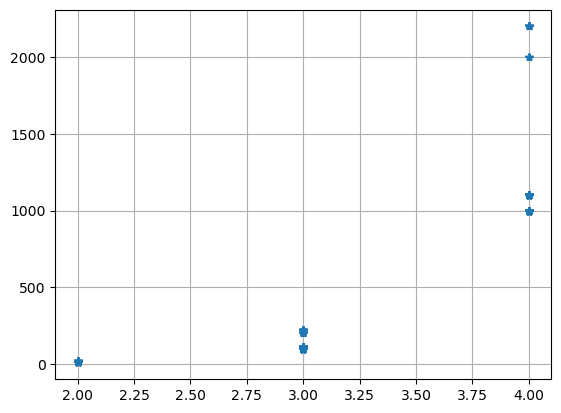

In [21]:
plt.plot([len(str(n)) for n in inter],inter, '*');
plt.grid()

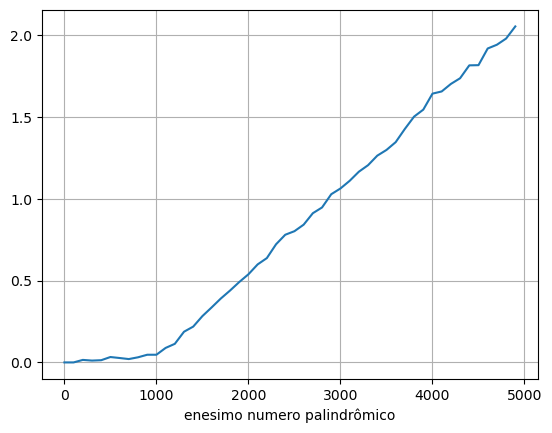

In [23]:
tempos = []
for i in range(1,5000,100):
    t0 = time.time()
    num_pal(i)
    tf = time.time()
    tempos.append(tf-t0)
    
plt.plot(range(1,5000,100), tempos)
plt.xlabel('enesimo numero palindrômico')
plt.grid()

In [27]:
time.time()

1686137209.534719

In [24]:
def iprimes2(limit):
    yield 2
    if limit < 3: return
    lmtbf = (limit - 3) // 2
    buf = [True] * (lmtbf + 1)
    for i in range((int(limit ** 0.5) - 3) // 2 + 1):
        if buf[i]:
            p = i + i + 3
            s = p * (i + 1) + i
            buf[s::p] = [False] * ((lmtbf - s) // p + 1)
    for i in range(lmtbf + 1):
        if buf[i]: yield (i + i + 3)

In [26]:
gpp= iprimes2(100)
gpp

<generator object iprimes2 at 0x00000226BCA90E10>

In [32]:
gpp.send(None)

7

In [36]:
for p in iprimes2(100):
    print(p)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


In [37]:
def primo_pal(m):
    """
    Retorna numero de palindromes menores que m
    """
    p=10
    n = 0
    palindromes = []
    for p in iprimes2(m):
        P = str(p)
        if len(set(P)) == 1:
            continue
        if P[::1] == P[::-1]:
            n += 1
            palindromes.append(p)
    return palindromes

In [41]:
primo_pal(50000)

[101,
 131,
 151,
 181,
 191,
 313,
 353,
 373,
 383,
 727,
 757,
 787,
 797,
 919,
 929,
 10301,
 10501,
 10601,
 11311,
 11411,
 12421,
 12721,
 12821,
 13331,
 13831,
 13931,
 14341,
 14741,
 15451,
 15551,
 16061,
 16361,
 16561,
 16661,
 17471,
 17971,
 18181,
 18481,
 19391,
 19891,
 19991,
 30103,
 30203,
 30403,
 30703,
 30803,
 31013,
 31513,
 32323,
 32423,
 33533,
 34543,
 34843,
 35053,
 35153,
 35353,
 35753,
 36263,
 36563,
 37273,
 37573,
 38083,
 38183,
 38783,
 39293]

The first 100 G numbers are:
1   1   1   2   1   2   2   2   2   3   
3   3   2   3   2   4   4   2   3   4   
3   4   5   4   3   5   3   4   6   3   
5   6   2   5   6   5   5   7   4   5   
8   5   4   9   4   5   7   3   6   8   
5   6   8   6   7   10  6   6   12  4   
5   10  3   7   9   6   5   8   7   8   
11  6   5   12  4   8   11  5   8   10  
5   6   13  9   6   11  7   7   14  6   
8   13  5   8   11  7   9   13  8   9   

The value of G(1000000) is 5402


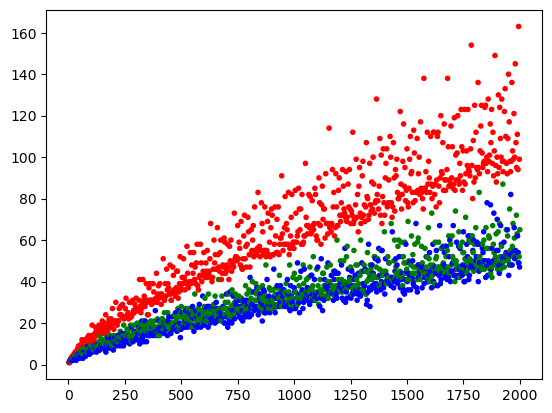

In [47]:
from matplotlib.pyplot import scatter, show
from sympy import isprime

def g(n):
    assert n > 2 and n % 2 == 0, 'n in goldbach function g(n) must be even'          
    count = 0
    for i in range(1, n//2 + 1):
        if isprime(i) and isprime(n - i):
            count += 1
    return count

print('The first 100 G numbers are:')
 
col = 1
for n in range(4, 204, 2):
    print(str(g(n)).ljust(4), end = '\n' if (col % 10 == 0) else '')
    col += 1

print('\nThe value of G(1000000) is', g(1_000_000))
 
x = range(4, 4002, 2)
y = [g(i) for i in x]
colors = [["red", "blue", "green"][(i // 2) % 3] for i in x]
scatter([i // 2 for i in x], y, marker='.', color = colors);

In [49]:
x=range(2,100,2)
[["red", "blue", "green"][(i//2) % 3] for i in x]

['blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue',
 'green',
 'red',
 'blue']

In [50]:
from itertools import cycle

In [51]:
n=0
for in cycle(['r','g','b']):
    
